In [2]:
from src.Generator import Generator
from src.Discriminator import Discriminator
from src.utils.tools import * 
from src.data.GenLoaders import *
from src.data.format_converter import data_converter
from src.training.trainer import *
import torch
from collections import Counter
torch.manual_seed(0); # Set for testing purposes, please do not change!

In [3]:
save_dir = 'data/'
data_converter(save_dir='data/', file_name="stamp_dataset_28.pkl" , label_as_strings=False, binarize_labels=True)
#dataloader=get_SNsLoader(save_dir,batch_size=32,file_name="td_ztf_stamp_17_06_20.pkl",label_as_strings=False,cut_around_center=True)

In [4]:
save_dir = 'data/'
#Carga de datos
with open(save_dir + "converted_binaryTrue_stamp_dataset_28.pkl", "rb") as f:
    data = pk.load(f)


print(data.keys())
#Separacion de los datos
Train_dict = data['Train']
Validation_dict = data['Validation']
Test_dict = data['Test']

train_images = Train_dict['images']
validation_images = Validation_dict['images']
test_images = Test_dict['images']

labels_train = Train_dict['labels']
labels_val = Validation_dict['labels']
labels_test = Test_dict['labels']


dict_keys(['Train', 'Validation', 'Test'])


Counter({0.0: 49198, 1.0: 1396})
Epoch 1/300


c:\Users\nfier\anaconda3\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


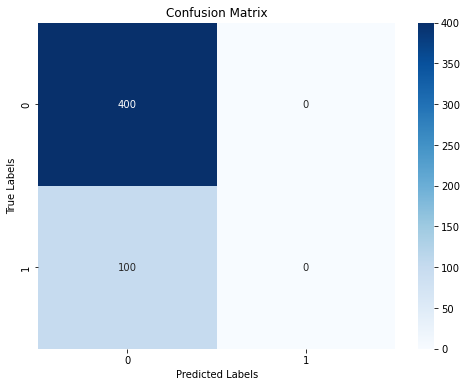

Val loss: 1.1070176810026169, Val acc: 0.8
Epoch 2/300


c:\Users\nfier\anaconda3\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Val loss: 1.103881947696209, Val acc: 0.8
Epoch 3/300
Val loss: 1.1049194484949112, Val acc: 0.8
Epoch 4/300
Val loss: 1.1048637442290783, Val acc: 0.8
Epoch 5/300


KeyboardInterrupt: 

In [5]:
epochs=300
train_loader,val_loader=get_training_loaders(batch_size=32,file_name="converted_binaryTrue_stamp_dataset_28.pkl",label_as_strings=False)
labels = train_loader.dataset.labels

# Assuming labels is a list or array containing your class labels
class_counts = Counter(labels)

# class_counts will be a dictionary where keys are class labels, and values are counts
print(class_counts)

#Training
curves=trainer(train_loader,val_loader,epochs=epochs,dir_name="binary_28")